# About

Try to detect crime hotspots for each Category of crime, and distance from the epicenters.

* not sure how to handle crimes that have stringy structures based on streets
* or have multiple hotspots

In [25]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

%matplotlib inline

%reload_ext autoreload
%autoreload 2
from src.features.build_features import DataFrameSelector, SFCCTransformer, print_summary

In [2]:
# loads data
train_pd = pd.read_csv("../data/raw/train.csv.zip", compression="zip")
test_pd = pd.read_csv("../data/raw/test.csv.zip", compression="zip")

# Outliers

Some crimes are oddly very much outside city limits, and all overlap each other

* we should ignore these outliers; their X and Y are probably miscoded
* affects about 67 records in train and 76 records in test
* latitude Y = 50 appears to be a good cut off

In [16]:
latitude_outlier = 50

In [17]:
train_pd[["X", "Y"]].query("Y >= @latitude_outlier").count()

X    67
Y    67
dtype: int64

In [18]:
test_pd[["X", "Y"]].query("Y >= @latitude_outlier").count()

X    76
Y    76
dtype: int64

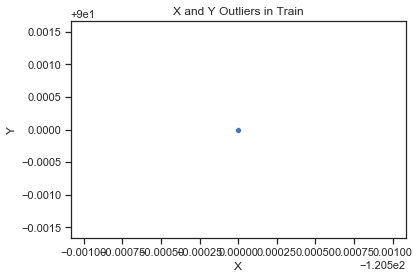

In [28]:
outliers = train_pd[["X", "Y"]].query("Y >= @latitude_outlier")

g = sns.scatterplot(x="X", y="Y", data=outliers).set_title("X and Y Outliers in Train")
plt.show()

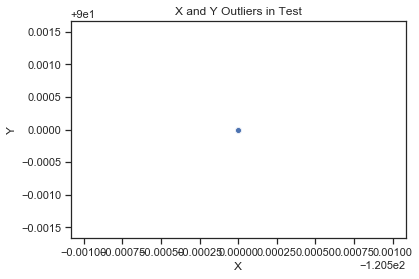

In [29]:
outliers = test_pd[["X", "Y"]].query("Y >= @latitude_outlier")

g = sns.scatterplot(x="X", y="Y", data=outliers).set_title("X and Y Outliers in Test")
plt.show()

# Visual Check of X and Y

* most Categories of crimes might have something approximating a central hotspot (e.g. vandalism, theft)
* but some might have multiple hotspots (e.g. prostitution, runaway)
* and the hexbin shows some Categories might have stringy structures based on streets  

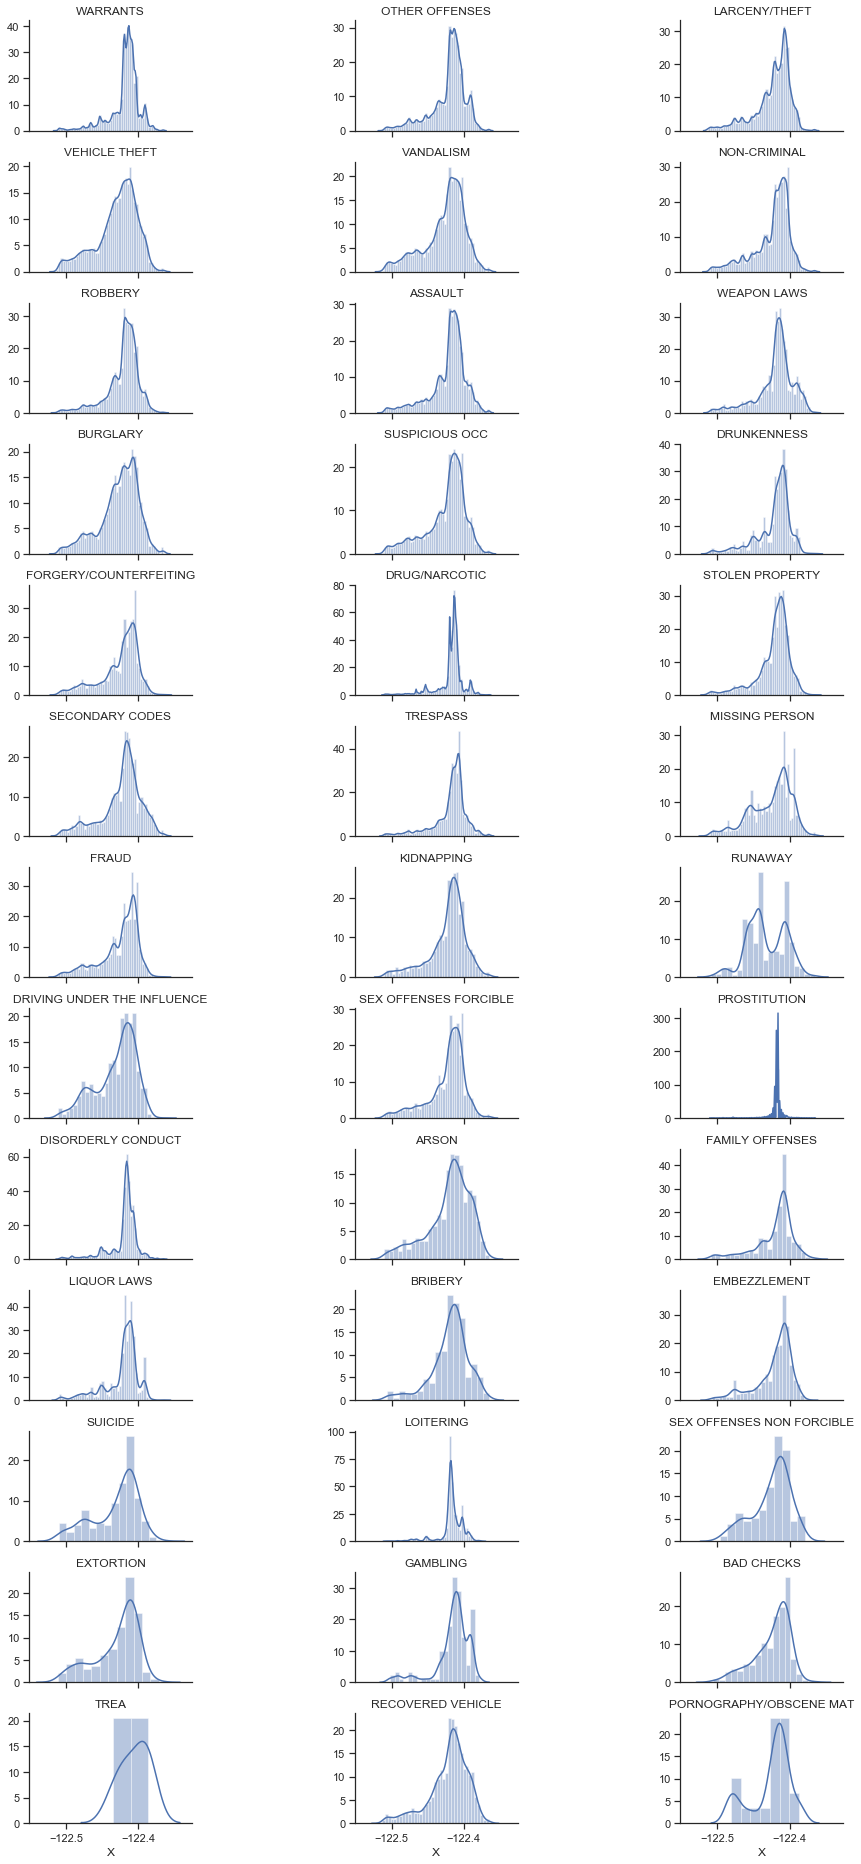

In [76]:
# Distribution of longitudes X
city = train_pd[["Category", "X", "Y"]].query("Y < @latitude_outlier")

g = sns.FacetGrid(city, col = "Category", col_wrap = 3, height = 2, aspect = 2, sharex = True, sharey = False)
g = g.map(sns.distplot, "X", kde = True)
g.set_titles("{col_name}")
plt.subplots_adjust(wspace = 1)
plt.show()

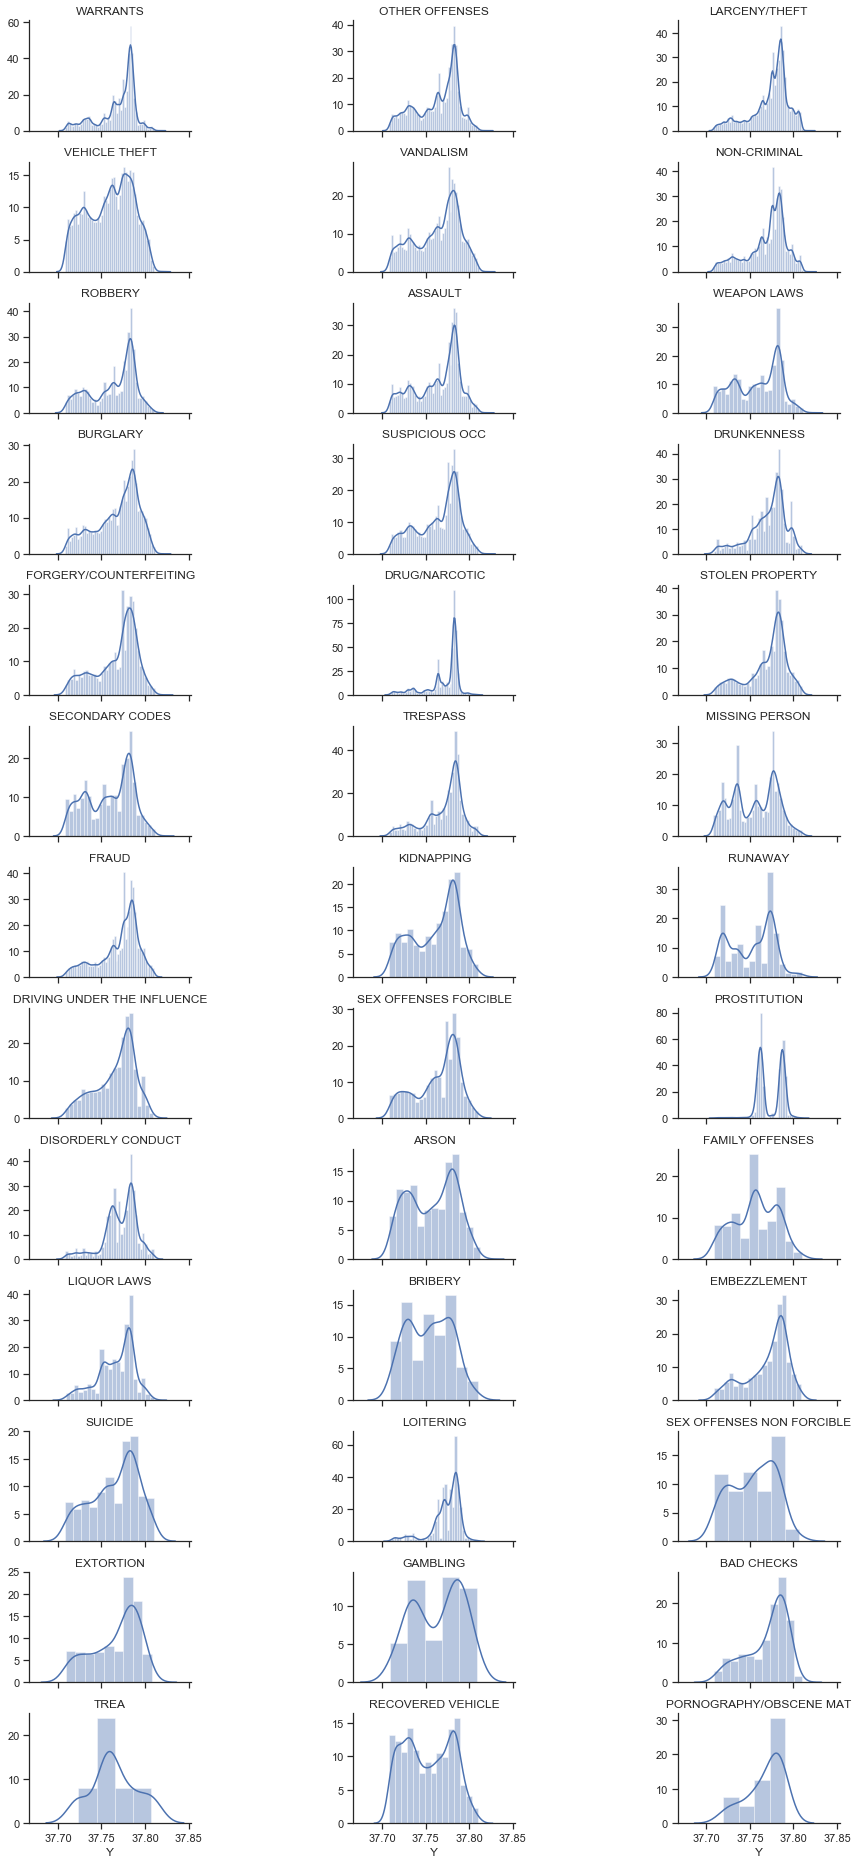

In [78]:
# Distribution of latitudes Y
city = train_pd[["Category", "X", "Y"]].query("Y < @latitude_outlier")

g = sns.FacetGrid(city, col = "Category", col_wrap = 3, height = 2, aspect = 2, sharex = True, sharey = False)
g = g.map(sns.distplot, "Y", kde = True)
g.set_titles("{col_name}")
plt.subplots_adjust(wspace = 1)
plt.show()

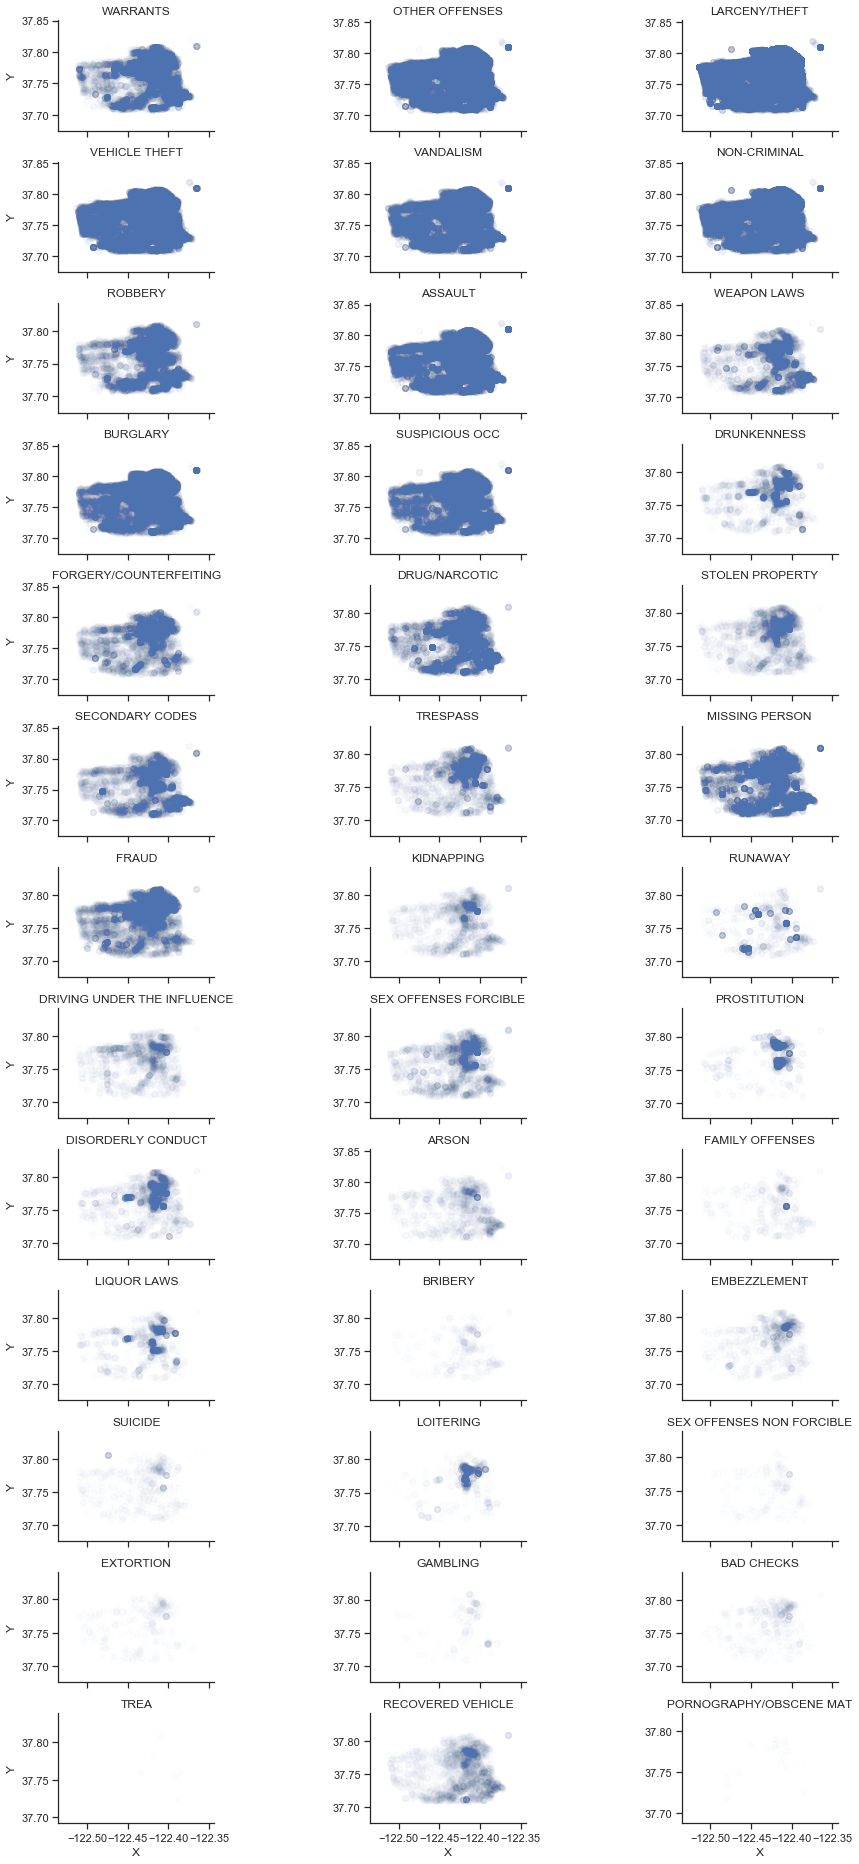

In [81]:
# scatter plot of long X and lat Y
city = train_pd[["Category", "X", "Y"]].query("Y < @latitude_outlier")

g = sns.FacetGrid(city, col = "Category", col_wrap = 3, height = 2, aspect = 2, sharex = True, sharey = False)
g = g.map(plt.scatter, "X", "Y", alpha = 0.01)
g.set_titles("{col_name}")
plt.subplots_adjust(wspace = 1)
plt.show()

C:\Users\yangyq\Anaconda3\envs\w207re-final-proj\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


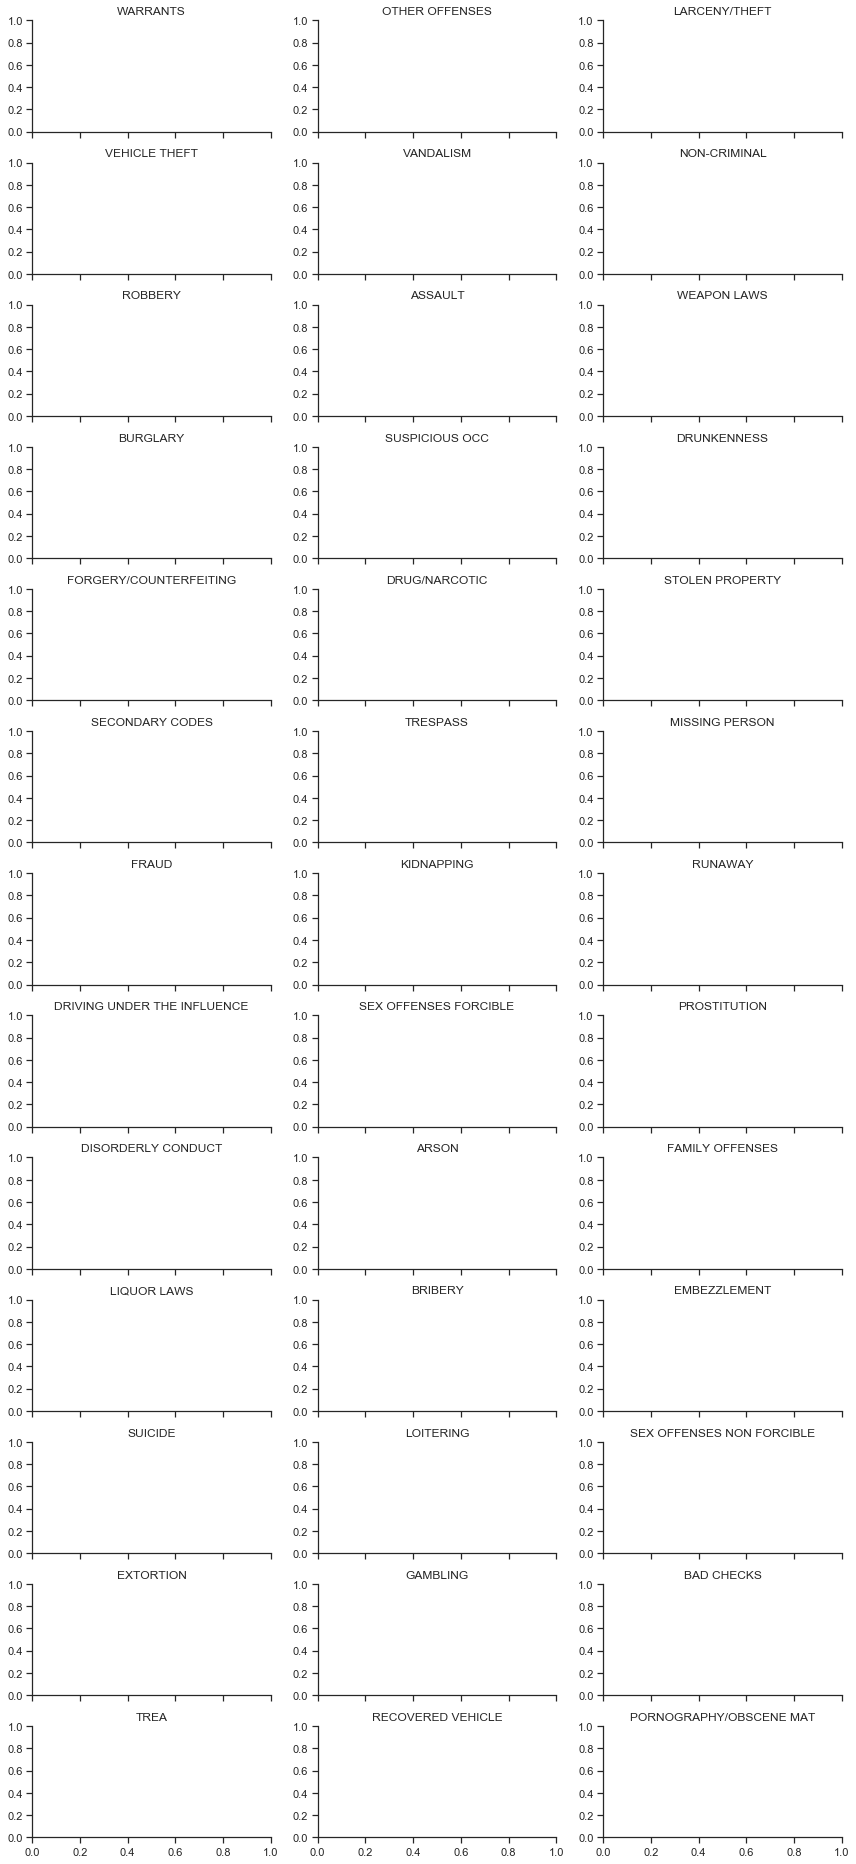

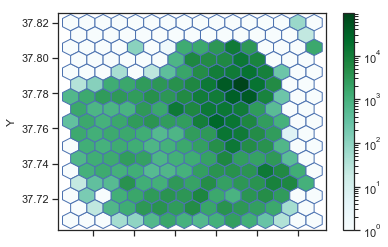

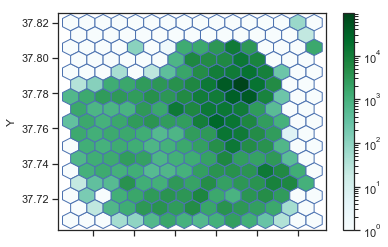

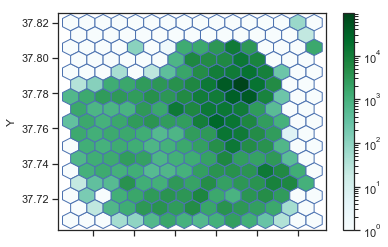

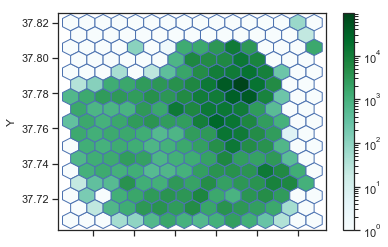

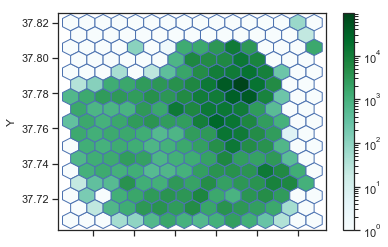

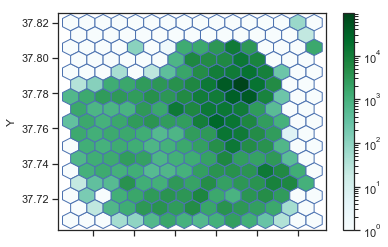

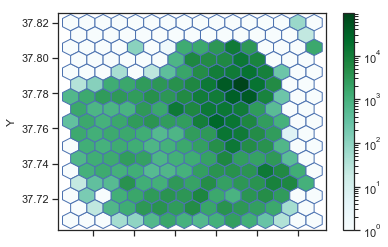

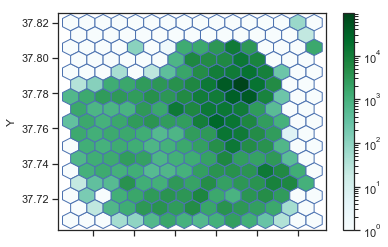

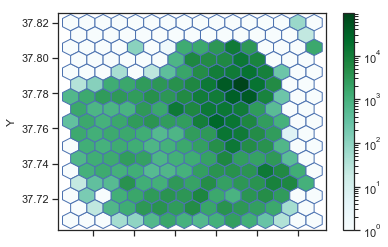

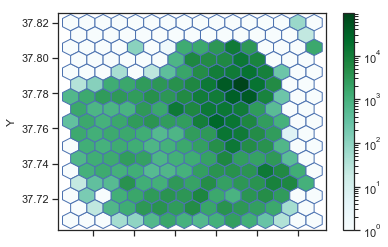

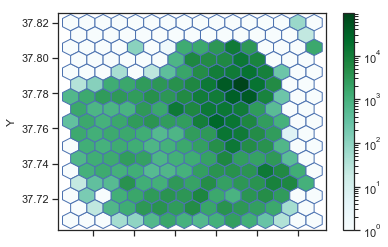

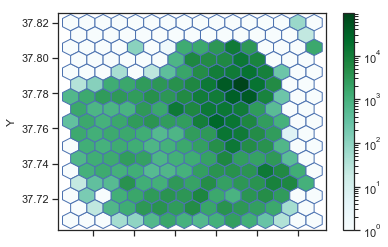

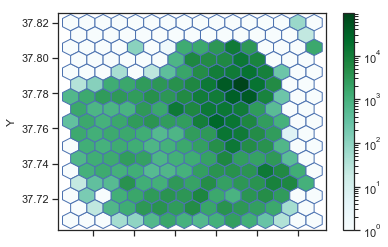

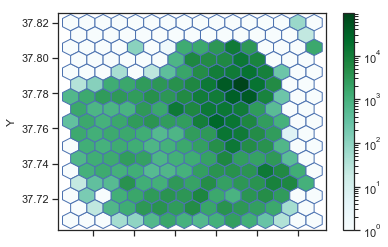

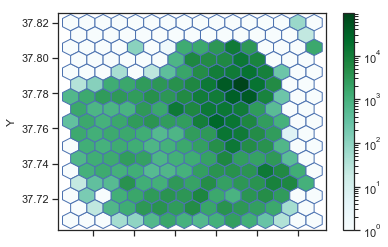

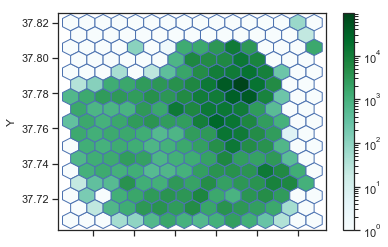

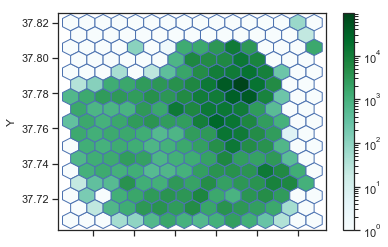

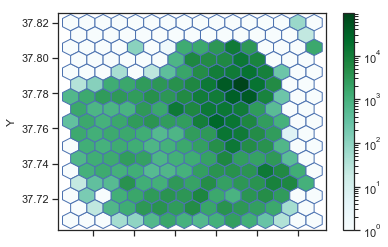

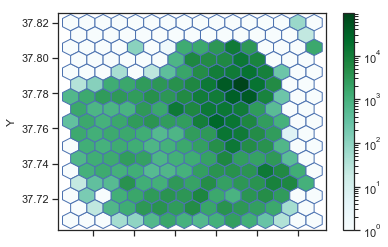

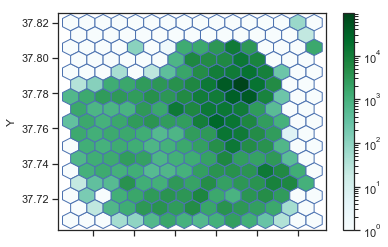

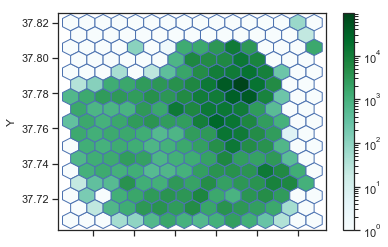

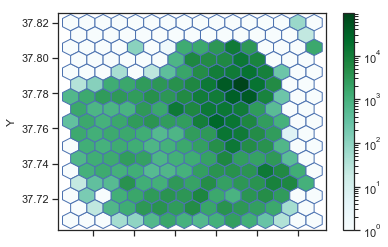

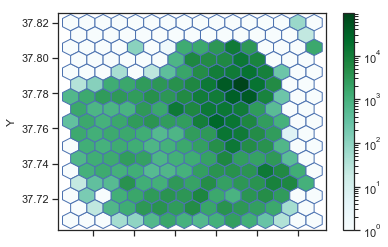

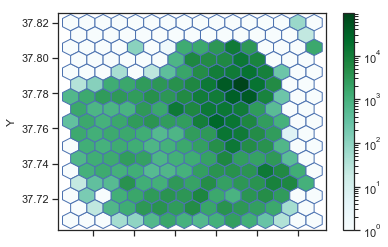

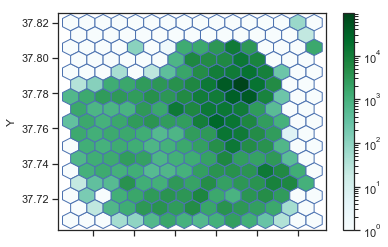

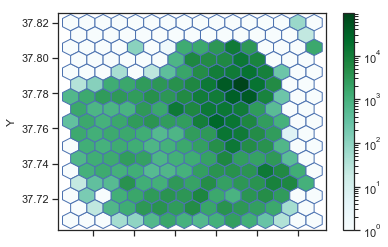

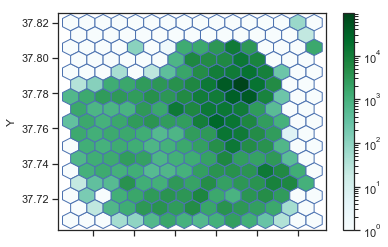

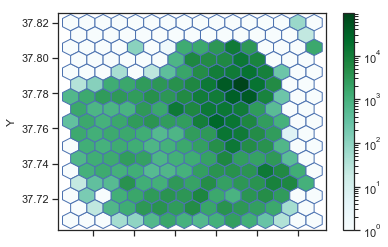

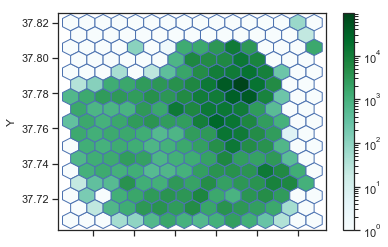

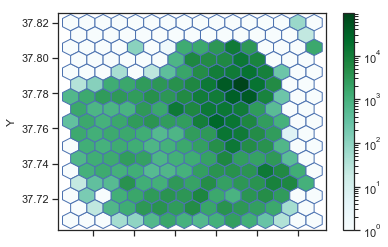

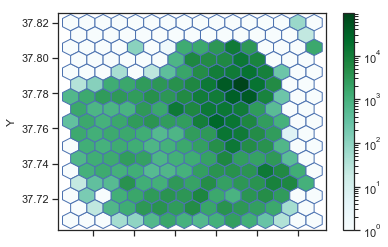

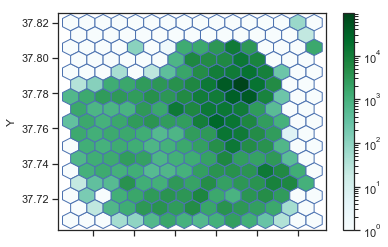

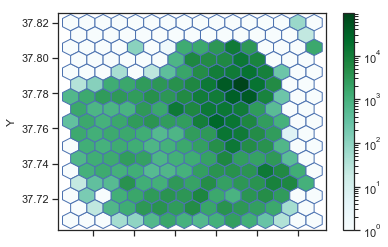

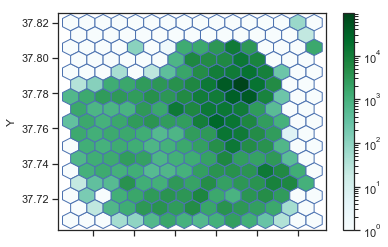

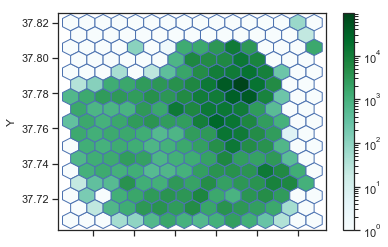

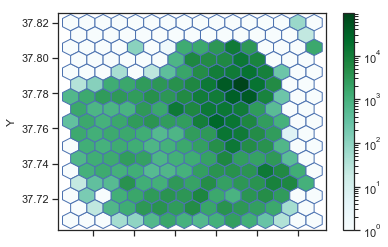

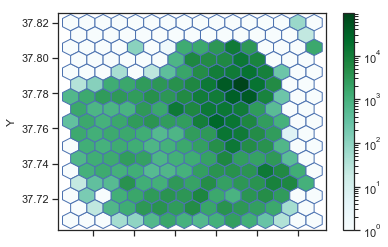

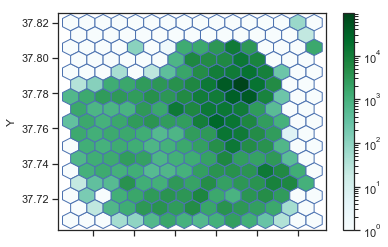

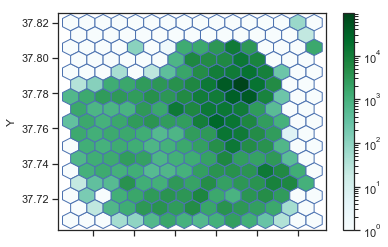

In [87]:
# hexbin of long X and lat Y
city = train_pd[["Category", "X", "Y"]].query("Y < @latitude_outlier")

g = sns.FacetGrid(city, col = "Category", col_wrap = 3, height = 2, aspect = 2, sharex = True, sharey = False)
g = g.map(city.plot.hexbin, x = "X", y = "Y", bins = "log", gridsize = 15)
g.set_titles("{col_name}")
plt.subplots_adjust(wspace = 1)
plt.show()